In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [36]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
import matplotlib.pyplot as plt

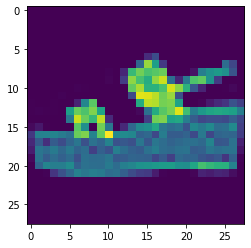

In [39]:
plt.imshow(x_train[12])
plt.show()

In [40]:
y_train[0]

9

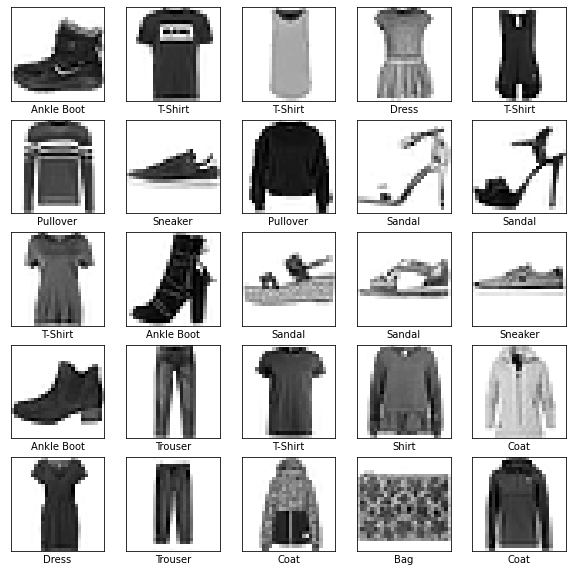

In [41]:
class_names = ['T-Shirt','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
# plt.show()

In [42]:
# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
# Introduced a new axis, because we will be using CNN and CNN expect 4D input shape
x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')

In [45]:
x_train.shape

(60000, 28, 28, 1)

In [46]:
# x_train[0]

In [47]:
# we shuffle the training and testing data and provide batch size
train_df = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_df = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(10000).batch(32)

In [48]:
train_df

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [49]:
# we are creating our model
class MyModel(Model):
  # __init__ is the constructor used to initialize variables
  # self is used to refer to current object
  def __init__(self):
    super(MyModel, self).__init__()   # calling parent class constructor. it means we are calling Model class __init__
    # first layer is convolutional layer
    self.conv1 = Conv2D(32, 3, activation='relu')
    # second layer is input layer - that is output of convolutional layer
    self.flatten = Flatten()
    # third layer is hidden layer
    self.hidden_layer = Dense(128, activation='relu')
    # last layer is our output layer
    self.output_layer = Dense(10, activation='softmax')
  
  def call(self, x):
    # calling all the layers one by one
    # output of one layer will be input for another layer
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.hidden_layer(x)
    x = self.output_layer(x)
    return x

In [50]:
# we are creating object of our model
model = MyModel()

In [51]:
model

In [52]:
# Few popular loss functions
# Regression
  # - MSE
  # - MAE
  # - Mean Squared Logarithmic Loss
# Binary Loss Function
  # - Binary Cross-Entropy
  # - Hinge Loss
  # - Squared Hinge Loss
# Multi-Class Categorical Loss Function
  # - Multi Class Cross Entropy
  # - Sparse Categorical Cross Entropy
  # - KL Divergence Loss

In [53]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [54]:
# Few popular Optmization Techniques
# Gradient Descent
  # - Batch Gradient Descent
  # - Stochastic Gradient Descent
  # - Mini Batch Gradient Descent
# Momentum
# AdaGrad
# AdaDelta
# Adam
# RMSProp

In [55]:
optimizer = tf.keras.optimizers.Adam()

In [56]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='train_acc')
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_acc')